In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ['emp', 'mus', 'rara', 'ory', 'fsi', 'lyn', 'lut', 'sus', 'mel', 'vul', 'lep', 'equ', 'cer', 'bos', 'gen', 'her', 'dam', 'fel', 'can', 'ovar', 'mafo', 'capi', 'caae', 'ovor', 'caca']

In [21]:
def parse_results(model):
    with open(model + ".txt", "r") as f:
        results = {
            "precision": float(f.readline().split(" ")[1]),
            "recall": float(f.readline().split(" ")[1]),
            "f1": float(f.readline().split(" ")[1]),
            "iou": float(f.readline().split(" ")[1]),
            "matrix": []
        }

        f.readline()
        while line := f.readline():
            if line.strip() == "": break
            results["matrix"].append(list(map(int, line.split(" "))))
    return results

models = {
    "YOLO": parse_results("yolo"),
    "FasterRCNN": parse_results("fasterrcnn"),
    "Megadetector": parse_results("megadetector")
}

# Plotting

In [29]:
# Compare the model's precision, recall, f1, and iou

results = pd.DataFrame({
    "model": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "iou": []
})
for model in models.keys():
    results = pd.concat([results, pd.DataFrame({
        "model": [model],
        "precision": [models[model]["precision"]],
        "recall": [models[model]["recall"]],
        "f1": [models[model]["f1"]],
        "iou": [models[model]["iou"]]
    })], ignore_index=True)
metrics_tables = {metric: group.drop(columns="metric") for metric, group in results.melt(id_vars=["model"], var_name="metric", value_name="value").groupby("metric")}
metrics_tables

{'f1':           model     value
 6          YOLO  0.956696
 7    FasterRCNN  0.774810
 8  Megadetector  0.925726,
 'iou':            model     value
 9           YOLO  0.951850
 10    FasterRCNN  0.821537
 11  Megadetector  0.945879,
 'precision':           model     value
 0          YOLO  0.957009
 1    FasterRCNN  0.781876
 2  Megadetector  0.931980,
 'recall':           model     value
 3          YOLO  0.956918
 4    FasterRCNN  0.773451
 5  Megadetector  0.930925}

In [23]:
metrics_tables = {metric: group.drop(columns="metric") for metric, group in results.groupby("metric")}

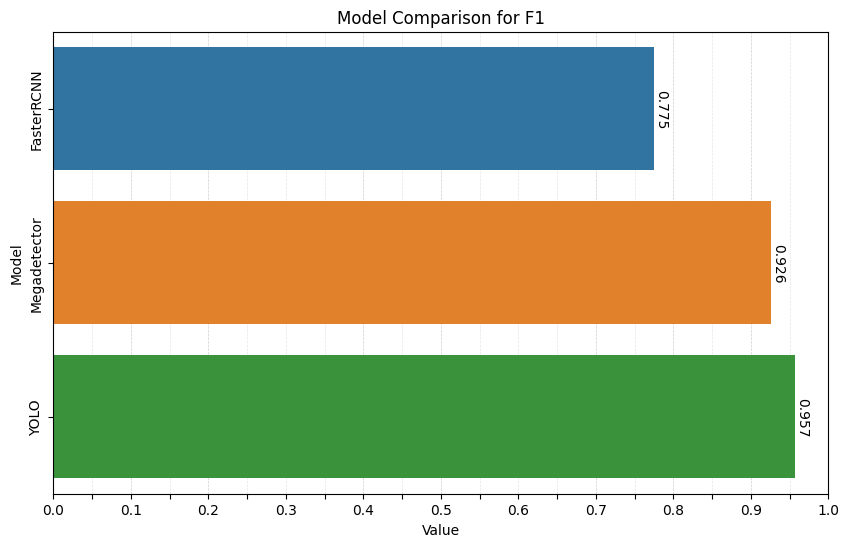

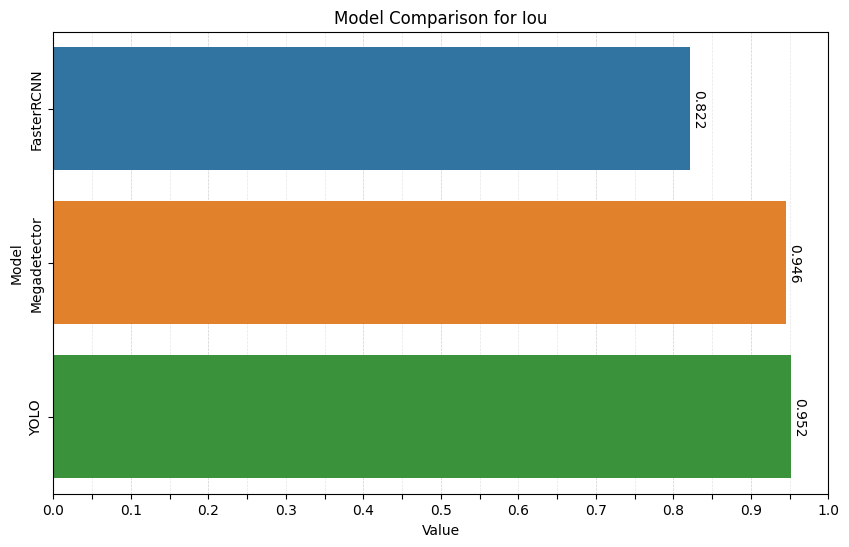

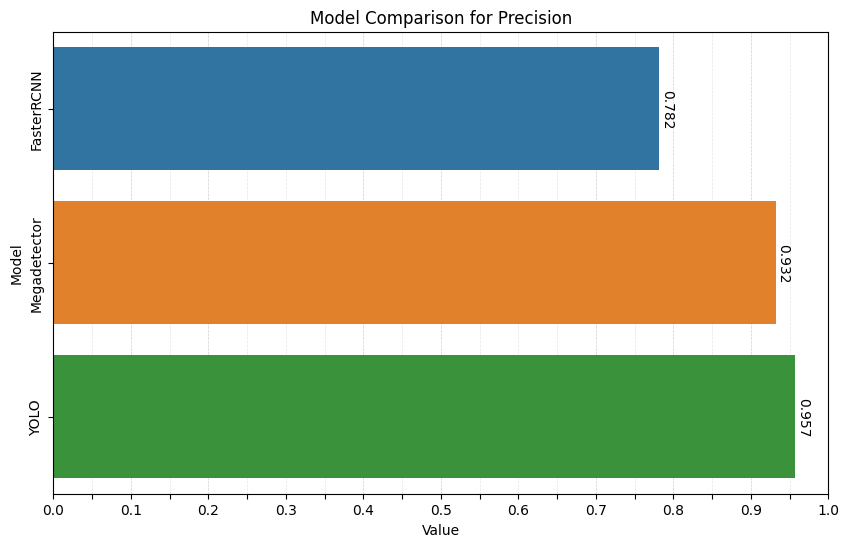

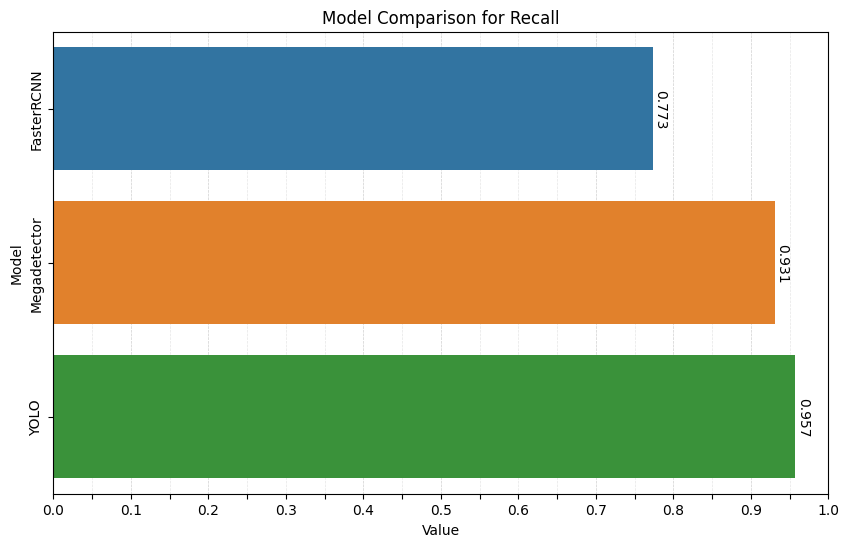

In [26]:
def get_metric_plot(table, metric):
    table = table.sort_values(by="value", ascending=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x="value", y="model", hue="model", data=table)
    plt.xlim(0.0, 1)
    plt.xlabel("Value")
    plt.xticks(ticks=[i * 0.05 for i in range(21)], labels=[f"{i * 0.05:.1f}" if i % 2 == 0 else "" for i in range(21)])
    plt.ylabel("Model")
    # Add exact value at the end of each bar
    for bar in plt.gca().patches:
        bar_index = bar.get_y() + bar.get_height() / 2
        plt.text(bar.get_width() + 0.01, bar_index, f'{bar.get_width():.3f}', va='center', ha='center', rotation=270)
            
    # Add vertical lines for better visualization
    for value in table["value"]:
        for tick in plt.xticks()[0]:
            if tick*100 % 2: plt.axvline(x=tick, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.2, zorder=0)
            else: plt.axvline(x=tick, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

    plt.yticks(rotation=90, va="center")
    plt.title(f"Model Comparison for {metric.capitalize()}")
    return plt

for metric, table in metrics_tables.items():
    get_metric_plot(table, metric).show()

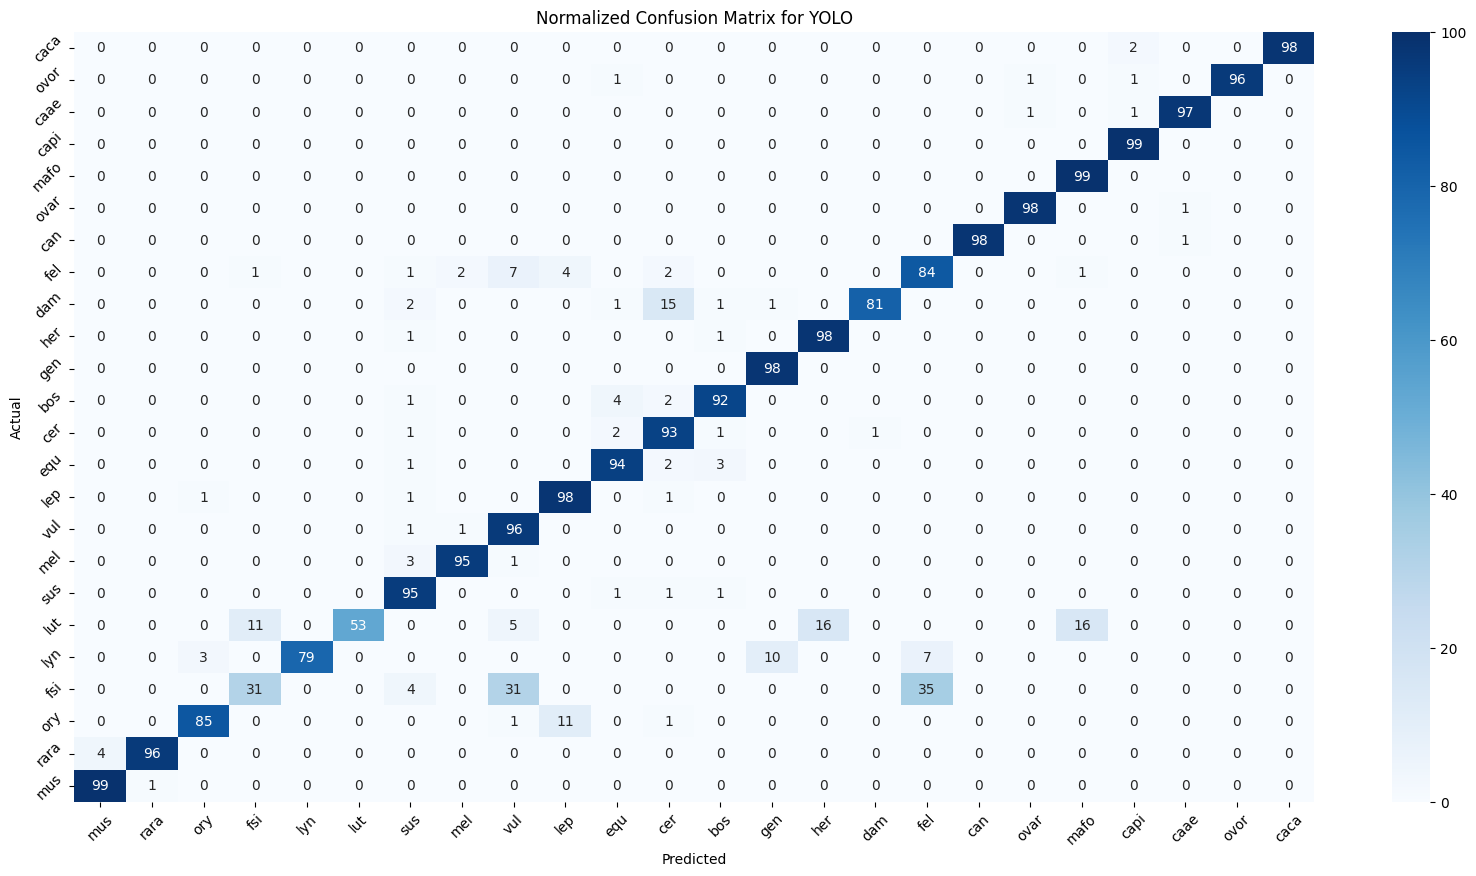

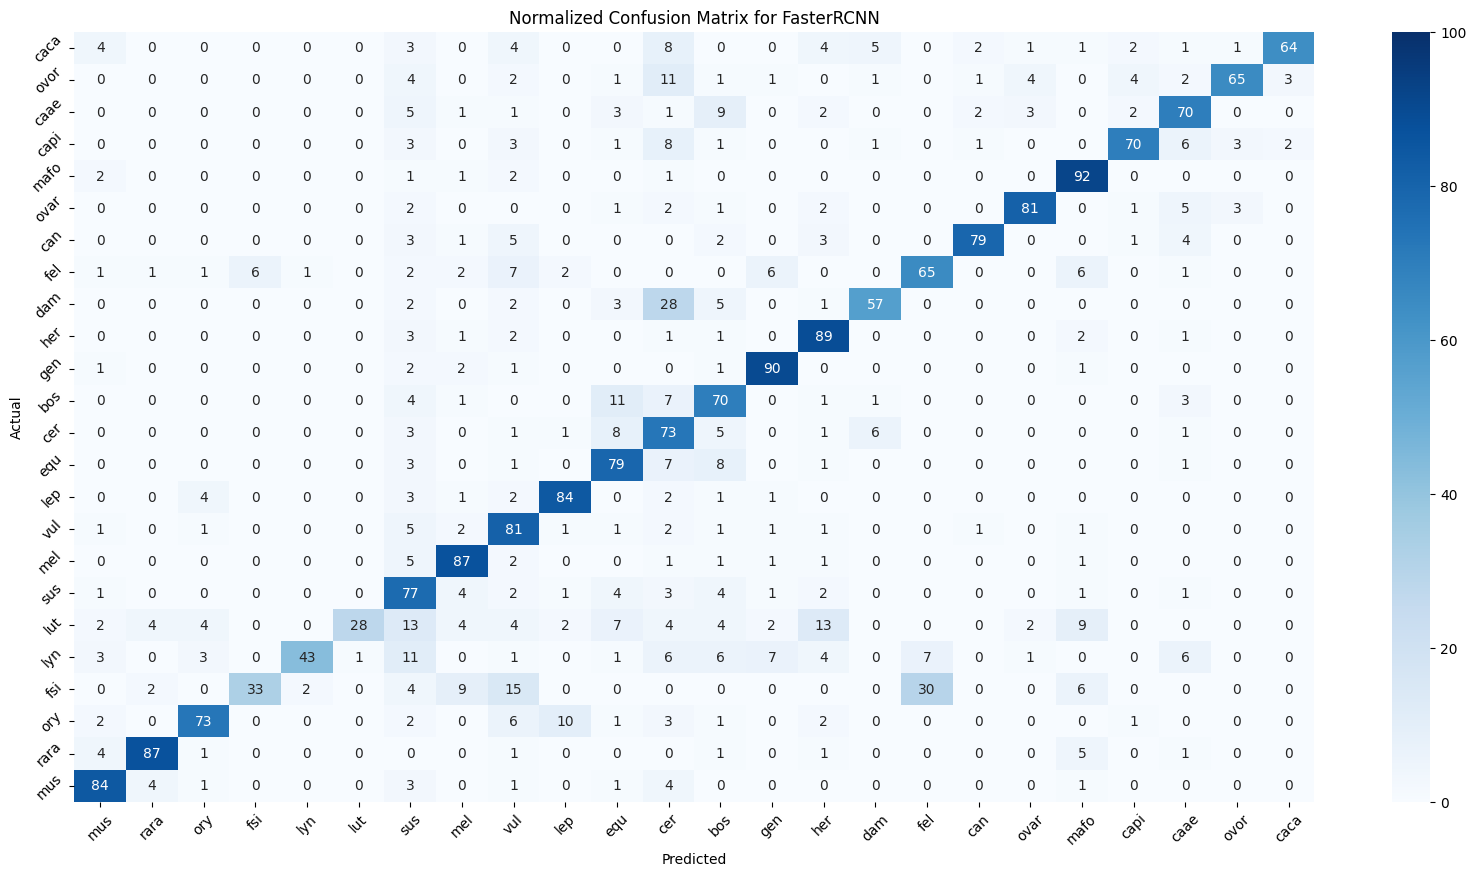

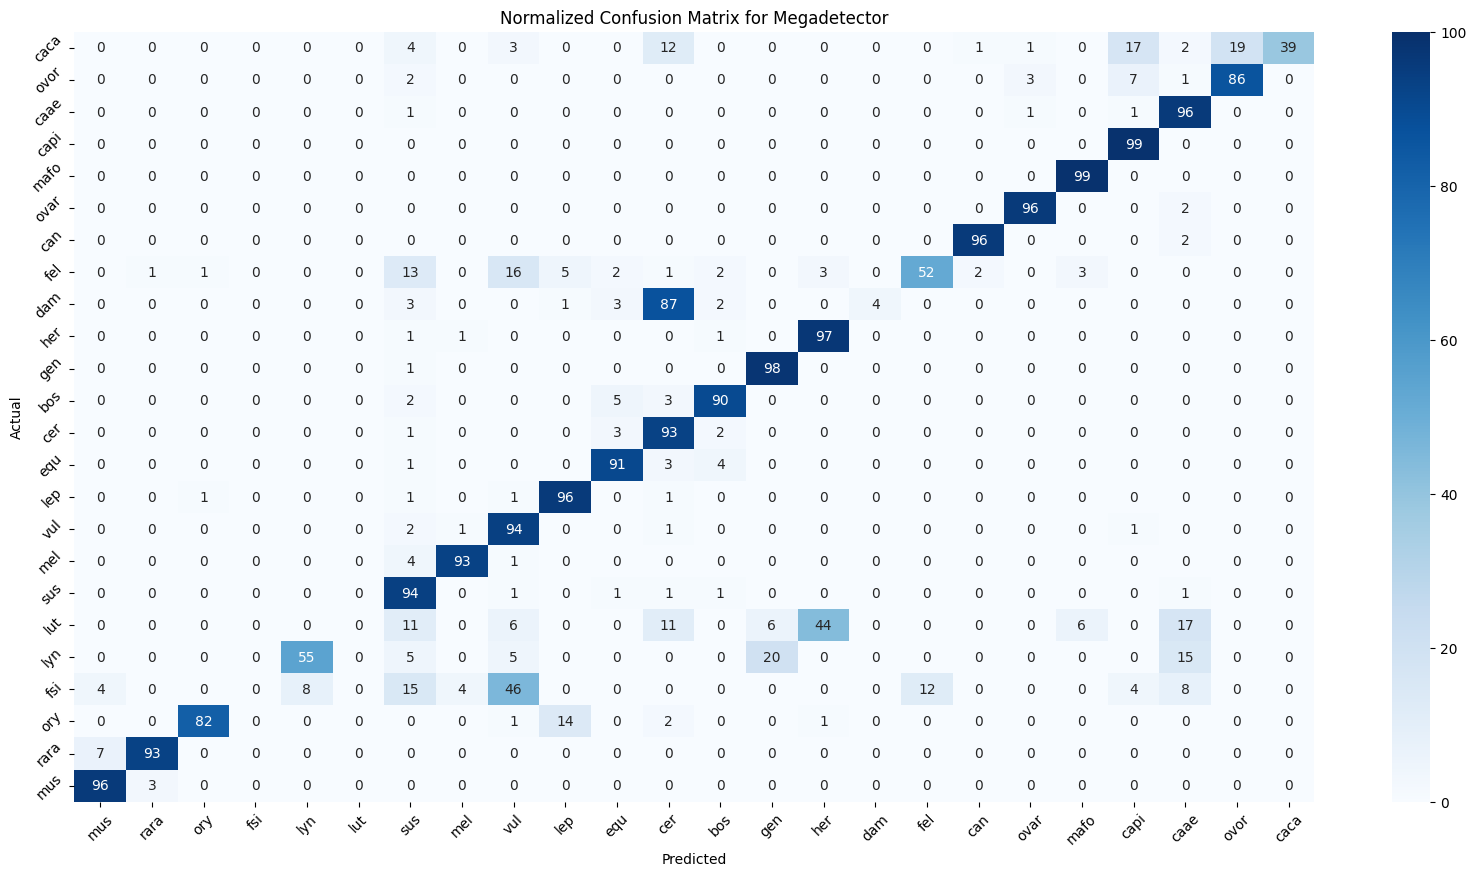

In [ ]:
# Normalize and show the confusion matrix for each model
def plot_confusion_matrix(matrix, model):
    matrix = round(matrix.div(matrix.sum(axis=1), axis=0).iloc[::-1] * 100)
    plt.figure(figsize=(20, 10))
    sns.heatmap(matrix, annot=True, fmt='g', vmin=0, vmax=100, cmap='Blues')

    # Set tick labels and axis labels
    step_values = [i for i in range(len(LABELS[1:]))]
    plt.xticks(ticks=[i + 0.5 for i in step_values], labels=LABELS[1:], rotation=45)
    plt.yticks(ticks=[i + 0.5 for i in step_values[::-1]], labels=LABELS[1:], rotation=45)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Normalized Confusion Matrix for {model}")
    return plt

for model in models.keys():
    matrix = pd.DataFrame(models[model]["matrix"])
    plot_confusion_matrix(matrix, model).show()